In [34]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
import random 
from numpy import linalg as LA

In [68]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

In [69]:
t_list=np.random.choice(60000,2000)
d_list=np.random.choice(10000,1000)
x_train=X_train[t_list]
y_train=Y_train[t_list].reshape(-1,1)
x_test=X_test[d_list]
y_test=Y_test[d_list].reshape(-1,1)

In [70]:
#Normalising
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [72]:
x_train.shape,x_test.shape

((2000, 28, 28), (1000, 28, 28))

In [38]:
def display_digit(num):
    label = y_train[num].argmax(axis=0)
    image = x_train[num].reshape([28,28])
    plt.title('Example: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()



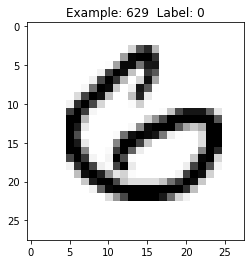

[6]


In [86]:
h=random.randint(0, x_train.shape[0])
display_digit(h)
print(y_train[h])

# Part A

In [98]:
n,m=784,625
W=np.random.random(size=(n,m))
W_new=np.zeros((n,m))

In [41]:
# W=np.random.normal(0,1,size=(n,m))      #w = np.random.normal(0,2, (784,625))
# from sklearn.preprocessing import  MinMaxScaler
# scalar=MinMaxScaler()
# W=scalar.fit_transform(W)

In [99]:
W.shape

(784, 625)

# Inputs

In [43]:
Max_epoch=20
alpha0=0.01

# R=0

In [44]:
epoch=0
W_old=W.copy()
W_new1=W.copy()

while(epoch<Max_epoch):
  alpha=alpha0-epoch*0.0004          #Change ittt
  epoch+=1
  print(epoch)
  alpha=alpha0-epoch*0.002
  q=np.zeros(2000)
  for k in range(2000):
    D=np.zeros(m)
    for j in range(m):
      delta=W_old[:,j]-x_train.reshape((2000,784))[k]
      D[j]=delta.dot(delta.T)
    q[k]=np.argmin(D)
    g=int(q[k])
    W_new1[:,g] = W_old[:,g] + alpha * ( x_train.reshape((2000,784))[k] - W_old[ :,g ] )

    
    W_old=W_new1.copy()


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [45]:
W_final1=W_new1.copy()
# print('iter',epoch)
q1=np.zeros(len(y_test))
for k in range(len(y_test)):
  D=np.zeros(m)
  for j in range(m):
    delta=W_final1[:,j]-x_test.reshape((len(y_test),784))[k]
    D[j]=delta.dot(delta.T)
  q1[k]=np.argmin(D)
  g=int(q1[k])
  # print(g)
pp1=np.unique(q1,return_counts=True)
len(pp1[0])

90

In [135]:
pp1

(array([  3.,   6.,  13.,  16.,  28.,  40.,  44.,  47.,  60.,  78., 107.,
        108., 120., 128., 130., 133., 137., 146., 157., 162., 166., 171.,
        191., 200., 202., 210., 214., 225., 229., 232., 235., 238., 242.,
        249., 263., 266., 267., 269., 272., 277., 278., 283., 284., 294.,
        298., 299., 300., 307., 314., 321., 322., 323., 329., 345., 355.,
        372., 373., 391., 392., 404., 406., 408., 411., 420., 424., 432.,
        433., 439., 441., 453., 461., 462., 470., 474., 479., 481., 483.,
        484., 496., 499., 514., 522., 528., 538., 542., 544., 574., 601.,
        614., 615.]),
 array([ 8,  9,  6,  1,  9,  9,  1,  4,  2, 30,  6,  1,  1,  1,  7,  3, 20,
        32,  4, 17,  1, 14, 39,  2,  5,  6, 13,  2,  1,  1,  3,  4,  2,  1,
        15,  3, 37,  4,  1, 13,  6, 12,  3,  1, 12,  3,  3, 19,  6,  1, 11,
        28, 11, 21, 70, 41,  1, 74,  1,  2,  1,  2, 10, 34, 40, 16,  5, 27,
         2, 16,  5,  3,  1,  4,  1,  2, 41,  2, 26, 14,  5,  8,  3, 14,  1,
      

The winners are #neurons : [ 9 16 17 19 21 22 26 34 36 39 41 44 47 50 51 52 53 54 55 57 63 64 65 67
 69 76 78 79 83 87]


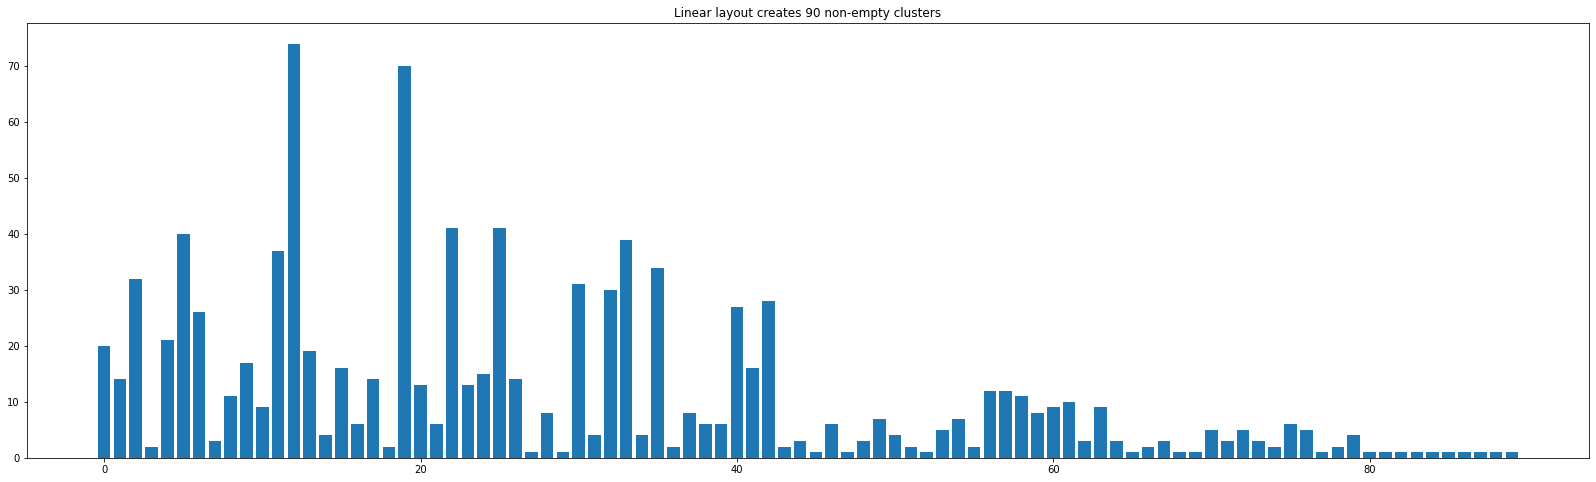

In [46]:
print('The winners are #neurons :',np.where(pp1[1]>10)[0])
from collections import Counter

cnt = Counter(q1)
plt.figure(figsize=(28, 8))
plt.bar(range(len(cnt)), list(cnt.values()), align='center');
# plt.xticks(range(len(cnt)), list(cnt.keys()), rotation='vertical');
# plt.xlim(0-1, len(cnt))
plt.title(f"Linear layout creates {len(cnt)} non-empty clusters");

# Part B

In [48]:
epoch=0
W_old=W.copy()
W_new=W.copy()
D=np.zeros(m)
q=np.zeros(2000)

while(epoch<Max_epoch):
  alpha=alpha0-epoch*0.0004
  epoch+=1
  print(epoch)
  q=np.zeros(2000)
  for k in range(2000):
    D=np.zeros(m)
    for j in range(m):
      delta=W_old[:,j]-x_train.reshape((2000,784))[k]
      D[j]=delta.dot(delta.T)
    q[k]=np.argmin(D)
    g=int(q[k])
    v=g+1
    z=g-1

    #updating W
    W_new[:,g] = W_old[:,g] + alpha * ( x_train.reshape((2000,784))[k] - W_old[ :,g ] )
    if (g>0 and g<(m-1)):
        # W_new[:,g] = W_old[:,g] + alpha * ( x_train.reshape((2000,784))[k] - W_old[ :,g ] )
        W_new[:,v] = W_old[:,v] + alpha * ( x_train.reshape((2000,784))[k] - W_old[ :, v ] )
        W_new[:,z] = W_old[:,z] + alpha * ( x_train.reshape((2000,784))[k] - W_old[ :, z ] )
    elif g==0: 
        # W_new[:,g] = W_old[:,g] + alpha * ( x_train.reshape((2000,784))[k] - W_old[ :,g ] )
        W_new[:,v] = W_old[:,v] + alpha * ( x_train.reshape((2000,784))[k] - W_old[ :, v ] )
    elif g==(m-1) :
        # W_new[:,g] = W_old[:,g] + alpha * ( x_train.reshape((2000,784))[k] - W_old[ :,g ] )
        W_new[:,z] = W_old[:,z] + alpha * ( x_train.reshape((2000,784))[k] - W_old[ :, z ] )

    
    v=g+2
    z=g-2
    if (g>0 and g<(m-1)):
        W_new[:,v] = W_old[:,v] + alpha * ( x_train.reshape((2000,784))[k] - W_old[ :, v ] )
        W_new[:,z] = W_old[:,z] + alpha * ( x_train.reshape((2000,784))[k] - W_old[ :, z ] )
    elif g==0: 
        W_new[:,v] = W_old[:,v] + alpha * ( x_train.reshape((2000,784))[k] - W_old[ :, v ] )
    elif g==(m-1) :
        W_new[:,z] = W_old[:,z] + alpha * ( x_train.reshape((2000,784))[k] - W_old[ :, z ] )

    W_old=W_new.copy()


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


# Test


In [49]:
W_old=W_new.copy()
# print('iter',epoch)
q2=np.zeros(len(y_test))
for k in range(len(y_test)):
  D=np.zeros(m)
  for j in range(m):
    delta=W_old[:,j]-x_test.reshape((len(y_test),784))[k]
    D[j]=delta.dot(delta.T)
  q2[k]=np.argmin(D)
  g=int(q2[k])
  # print(g)
pp2=np.unique(q2,return_counts=True)
len(pp2[0])

38

The winners are #neurons : [ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 33 35]


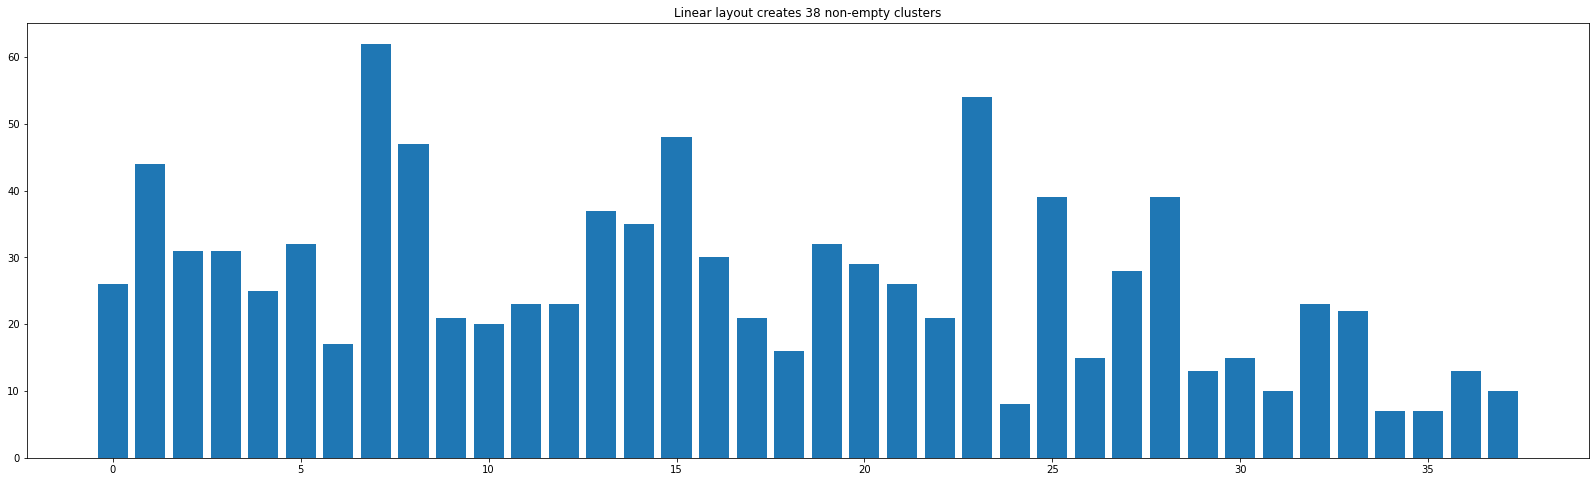

In [136]:
print('The winners are #neurons :',np.where(pp2[1]>10)[0])
from collections import Counter

cnt = Counter(q2)
plt.figure(figsize=(28, 8))
plt.bar(range(len(cnt)), list(cnt.values()), align='center');
# plt.xticks(range(len(cnt)), list(cnt.keys()), rotation='vertical');
# plt.xlim(0-1, len(cnt))
plt.title(f"Linear layout creates {len(cnt)} non-empty clusters");

# Part C: Square with R=1

In [108]:
R         = 1
alpha     = 0.9
dim_ratio = 0.95
Max_epoch=10

In [109]:
def eval_D(W, x):
  Dj = np.zeros((25, 25))
  for row in range(25):
    for col in range(25):
      Wij = W[row][col]
      tmp = (Wij - x.flatten()).reshape(1, -1)
      Dj[row][col] = tmp.dot(tmp.T)
  return Dj

In [110]:
def eval_sq_neighborhood(ri, ci, R):
  rl, rh = max(ri-R, 0), min(ri+R, 24)
  cl, ch = max(ci-R, 0), min(ci+R, 24)
  neighborhood = [list(range(rl, rh+1)), list(range(cl, ch+1))]
  return neighborhood

In [111]:
def update_W(W, x, ri, ci, neigh, alpha):
  for row in neigh[0]:
    for col in neigh[1]:
      W[row][col] += (alpha*(x - W[row][col])).squeeze()
  return W

In [112]:
# W = 1*np.random.random(25*25*28*28).reshape(25, 25, 28*28)
W=W.reshape(25,25,28*28)
for t in range(Max_epoch):
  for i, x in enumerate(x_train):
    # print(f"\rIteration: {t+1}, Image: {i+1}", end="")
    Dj = eval_D(W, x)
    ri, ci = np.unravel_index(np.argmin(Dj), Dj.shape)
    neigh = eval_sq_neighborhood(ri, ci, R)
    W = update_W(W, x.flatten(), ri, ci, neigh, alpha*dim_ratio**t)

In [113]:
cluster = []
for x in x_test:
  D = eval_D(W, x)
  cluster.append(np.argmin(D))

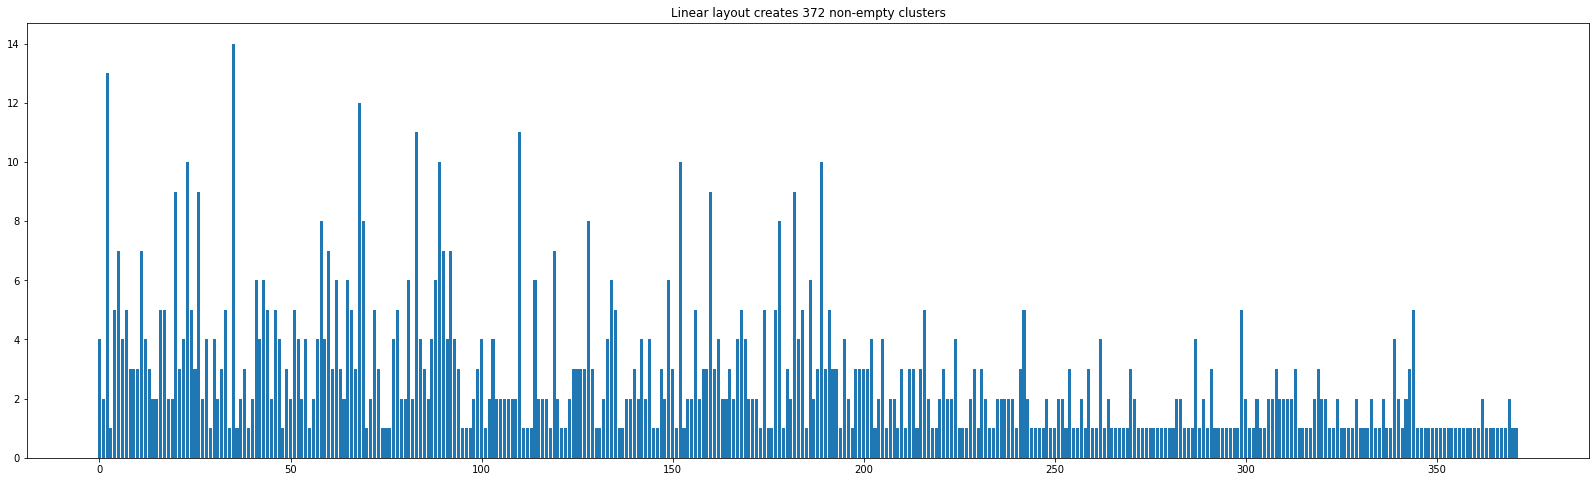

In [114]:
cnt = Counter(cluster)
plt.figure(figsize=(28, 8))
plt.bar(range(len(cnt)), list(cnt.values()), align='center');
# plt.xticks(range(len(cnt)), list(cnt.keys()), rotation='vertical');
# plt.xlim(0-1, len(cnt))
plt.title(f"Linear layout creates {len(cnt)} non-empty clusters");

In [115]:
W_finalll=W.reshape((625,784))

In [134]:
cnt

Counter({0: 1,
         2: 6,
         3: 3,
         4: 2,
         5: 2,
         7: 2,
         8: 2,
         9: 1,
         10: 1,
         11: 4,
         12: 4,
         13: 5,
         14: 2,
         15: 2,
         19: 3,
         20: 5,
         21: 3,
         24: 1,
         30: 3,
         31: 3,
         32: 1,
         34: 1,
         35: 2,
         36: 1,
         38: 1,
         41: 2,
         42: 3,
         43: 5,
         44: 1,
         45: 4,
         48: 3,
         49: 3,
         50: 2,
         51: 1,
         54: 1,
         56: 11,
         57: 1,
         58: 1,
         60: 3,
         61: 2,
         63: 1,
         66: 1,
         67: 1,
         69: 1,
         71: 1,
         73: 5,
         76: 1,
         78: 1,
         79: 2,
         83: 3,
         84: 2,
         89: 2,
         92: 2,
         93: 1,
         95: 1,
         96: 2,
         97: 5,
         98: 4,
         99: 11,
         102: 2,
         104: 1,
         106: 2,
         10

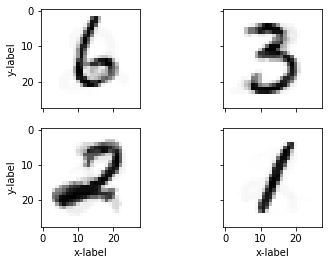

In [131]:
listk=[56,99,299,389,510,619]
fig, axs = plt.subplots(2, 2)
for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

axs[0, 0].imshow(W_finalll[listk[0],:].reshape((28,28)),cmap='Greys')
# axs[0, 0].set_title('Axis [0, 0]')
axs[0, 1].imshow(W_finalll[listk[1],:].reshape((28,28)),cmap='Greys')
# axs[0, 1].set_title('Axis [0, 1]')
axs[1, 0].imshow(W_finalll[listk[2],:].reshape((28,28)),cmap='Greys')
# axs[1, 0].set_title('Axis [1, 0]')
axs[1, 1].imshow(W_finalll[listk[3],:].reshape((28,28)),cmap='Greys')
# axs[1, 1].set_title('Axis [1, 1]')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()